In [1]:
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import FancyArrowPatch
from shapely.geometry import LineString

# Ensure project root (where scripts live) is on the import path
PROJECT_ROOT_CANDIDATE = Path.cwd()
if not (PROJECT_ROOT_CANDIDATE / "sent_si.py").exists():
    PROJECT_ROOT_CANDIDATE = PROJECT_ROOT_CANDIDATE.parent
if str(PROJECT_ROOT_CANDIDATE) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT_CANDIDATE))

from sent_si import read_network_data
from spatial import *

plt.rcParams["figure.dpi"] = 120


In [2]:
new_fn = "../params/hort365_NZ.csv"
ranked_data = pd.read_csv("sentinel_rank_table.csv")
prop_data = pd.read_csv("../params/2024_prop_dat.csv")
all_data = link_rank_prop_data(ranked_data,prop_data)
rank_type = "R_F"
rank_num = 2
ranking_nums = {}
rf_list = list(all_data["R_F"])
for x in rf_list:
    if x not in ranking_nums:
        ranking_nums[x] = 1
    else:
        ranking_nums[x] += 1

subset_nodes = get_subset(new_fn,rank_num,all_data,rank_type)

{9775}
       PROPERTY_ID  GPS_CENTRE_LATITUDE  GPS_CENTRE_LONGITUDE  \
25917         2115           176.271429            -37.828929   

       PROPERTY_AREA_HECTARES  PROPERTY_BLOCKAREA_PRODUCTIVE_HECTARES  \
25917                0.233693                                     NaN   

      PROPERTY_TYPES  REGION_ID COUNTRY GEO_HASH  
25917          0,204        2.0      NZ   rcm2g1  


In [3]:
node_types = list(subset_nodes.keys())
class_nodes = pd.DataFrame()
for n in node_types:
    matching_nodes = all_data.loc[all_data['PROPERTY_ID'].isin(subset_nodes[n])] 
    matching_nodes["node_type"] = n
    class_nodes = pd.concat([class_nodes,matching_nodes],ignore_index=True)
all_data = class_nodes

/tmp/ipykernel_156598/2444400178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_nodes["node_type"] = n
/tmp/ipykernel_156598/2444400178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_nodes["node_type"] = n
/tmp/ipykernel_156598/2444400178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [4]:
all_data.columns

Index(['PROPERTY_ID', 'dF_sum', 'dI_mean', 'dT_mean', 'R_F', 'R_I', 'R_T', 'h',
       'i_d', 'o_d', 'o_w', 'i_w', 'w', 'd', 'close', 'bc', 'ev', 'harm',
       'clust', 'GPS_CENTRE_LATITUDE', 'GPS_CENTRE_LONGITUDE',
       'PROPERTY_AREA_HECTARES', 'PROPERTY_BLOCKAREA_PRODUCTIVE_HECTARES',
       'PROPERTY_TYPES', 'REGION_ID', 'COUNTRY', 'GEO_HASH', 'node_type'],
      dtype='object')

In [5]:
arrow_colors = {"out_comp":"#2166ac",
                "in_neigh":"#b2182b",
                "out_neigh":"#67a9cf",
                "top_id":"black",
                "in_comp":"#ef8a62",
                "seeds":"#4d4d4d",
               "both_neigh": "orange"}
alpha_vals = {"out_comp":0.8,
                "in_neigh":1,
                "out_neigh":1,
                "top_id":1,
                "in_comp":0.8,
                "seeds":0.05,
                "both_neigh":1}
size_vals = {"out_comp":35,
                "in_neigh":75,
                "out_neigh":75,
                "top_id":85,
                "in_comp":35,
                "seeds":35,
                "both_neigh":75}
node_zorder = {"out_comp":4,
                "in_neigh":2,
                "out_neigh":3,
                "top_id":1,
                "in_comp":5,
                "seeds":4,
                "both_neigh":2}

      PROPERTY_ID    dF_sum   dI_mean   dT_mean  R_F   R_I   R_T          h  \
1594         9775  0.091479  0.044794  0.395892  2.0  11.0  22.0  46.947626   

      i_d  o_d  ...     clust         lat       long  PROPERTY_AREA_HECTARES  \
1594   72   81  ...  0.113927  176.535313 -37.854867               46.947626   

      PROPERTY_BLOCKAREA_PRODUCTIVE_HECTARES  PROPERTY_TYPES  REGION_ID  \
1594                                   32.96             200        2.0   

      COUNTRY  GEO_HASH  node_type  
1594       NZ    rcm89h     top_id  

[1 rows x 28 columns]


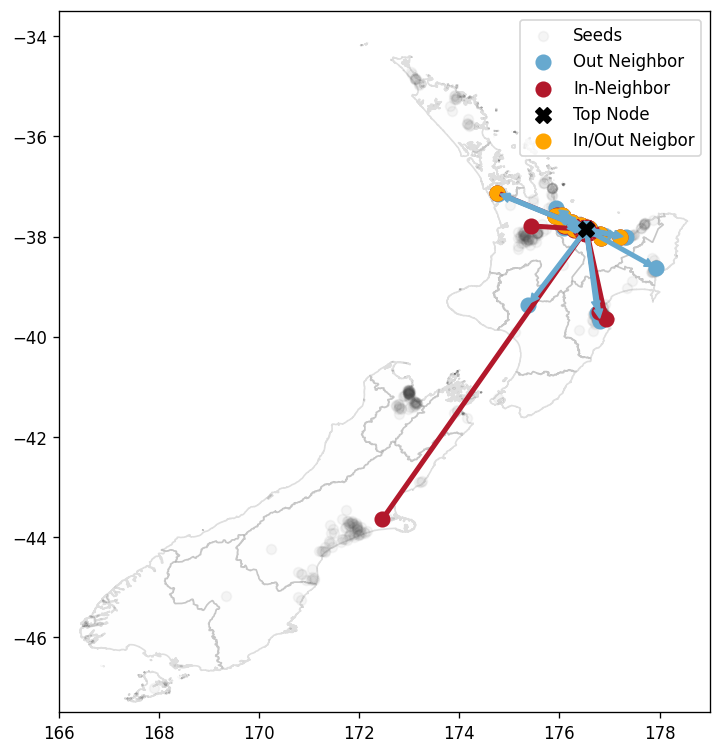

In [6]:
fp = "../params/regional-council-2025-clipped.shp"
all_data = all_data.rename(columns={"GPS_CENTRE_LONGITUDE":"long","GPS_CENTRE_LATITUDE":"lat"})
plot_NZ_nodes_arrows(fp,rank_num,all_data,subset_nodes,arrow_colors,alpha_vals,size_vals,node_zorder)
title = "NZ_"+str(rank_type)+"_"+str(rank_num)+".png"
plt.savefig("figs/"+title)